## Tutorial

Most of today will be spent working through examples of a variety of plot types that can be generated using R and ggplot2. Work through the provided code and talk to your neighbor about what is happening and why it works. Make sure to ask any questions you may have.

&nbsp;

A lot of the syntax in plotnine is very similar to that of ggplot2. The ggplot cheatsheet is therefore useful, but not exactly correct in terms of syntax. The following website has a complete documentation of plotnine and will help to translate ggplot2 syntax into plotnine syntax: http://plotnine.readthedocs.io/en/stable/api.html.

&nbsp;

In [1]:
import numpy
import pandas
from plotnine import *

mpg=pandas.read_csv("mpg.txt",sep="\t",header=0)

mpg.shape

mpg.head(5)

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy
0,audi,a4,1.8,1999,4,auto(l5),f,18,29
1,audi,a4,1.8,1999,4,manual(m5),f,21,29
2,audi,a4,2.0,2008,4,manual(m6),f,20,31
3,audi,a4,2.0,2008,4,auto(av),f,21,30
4,audi,a4,2.8,1999,6,auto(l5),f,16,26


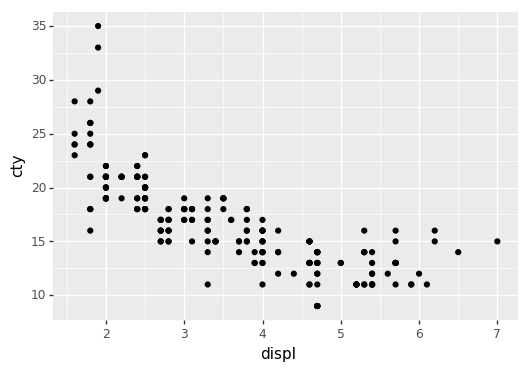

<ggplot: (287683557)>

In [2]:
# plot of displacement (engine size) vs. city miles per gallon (cty)
a=ggplot(mpg,aes(x="displ",y="cty"))
a+geom_point()+coord_cartesian()

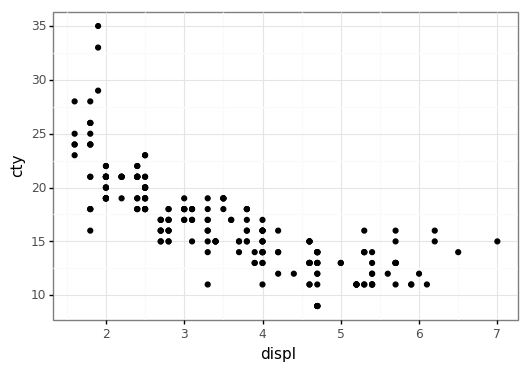

<ggplot: (291141281)>

In [3]:
# remove grey background
a+geom_point()+coord_cartesian()+theme_bw()

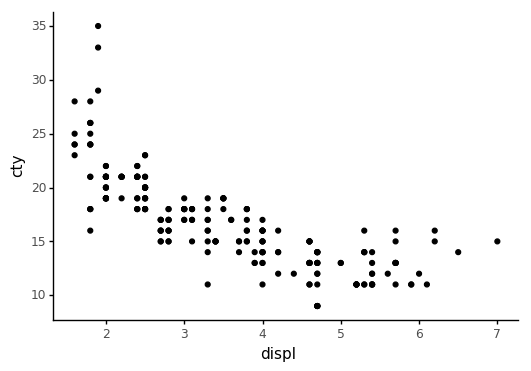

<ggplot: (275809445)>

In [4]:
# remove grey background and gridlines
a+geom_point()+coord_cartesian()+theme_classic()

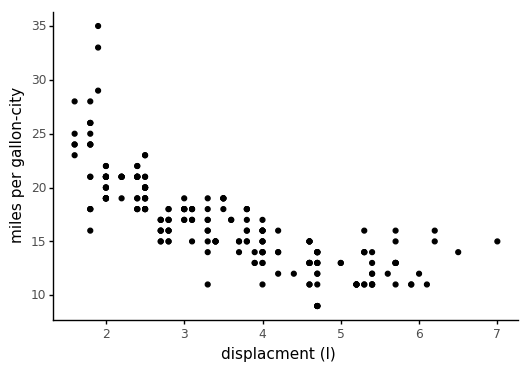

<ggplot: (291245617)>

In [5]:
# change the x and y labels; cartesian coordinates are default
a+geom_point()+theme_classic()+xlab("displacment (l)")+ylab("miles per gallon-city")

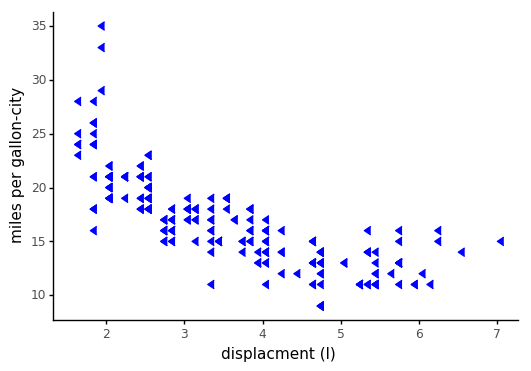

<ggplot: (291474453)>

In [6]:
# arguments to geom_point() can alter the appearance of the points
a=ggplot(mpg,aes(x="displ",y="cty"))+geom_point(color="blue",shape=4,size=3)
a+theme_classic()+xlab("displacment (l)")+ylab("miles per gallon-city")

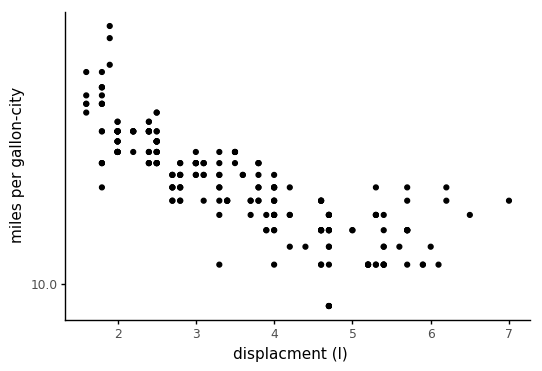

<ggplot: (291498433)>

In [7]:
# log transform the y-axis
a=ggplot(mpg,aes(x="displ",y="cty"))+geom_point()+theme_classic()
a+xlab("displacment (l)")+ylab("miles per gallon-city")+scale_y_log10()

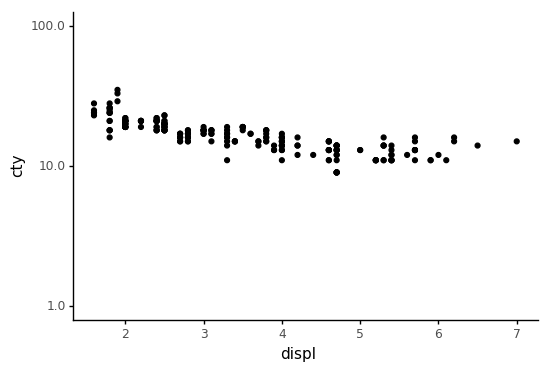

<ggplot: (287696481)>

In [8]:
# arguments to scale can also customize the range and tick locations
a=ggplot(mpg,aes(x="displ",y="cty"))+geom_point()+theme_classic()
a+scale_y_log10(limits=[1,100],breaks=[1,10,100])

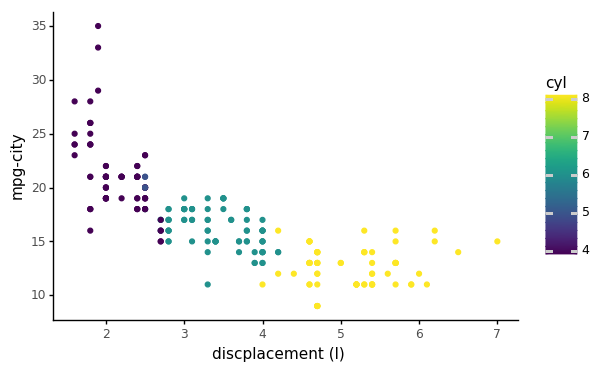

<ggplot: (291614565)>

In [9]:
# we can also color code points based on continuous or categorical variables
# continuous
a=ggplot(mpg,aes(x="displ",y="cty"))+theme_classic()
a+geom_point(aes(color="cyl"))+xlab("discplacement (l)")+ylab("mpg-city")

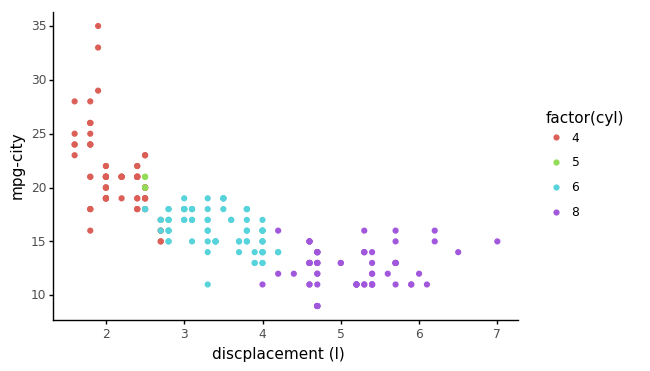

<ggplot: (291505545)>

In [10]:
# categorical
a+geom_point(aes(color="factor(cyl)"))+xlab("discplacement (l)")+ylab("mpg-city")

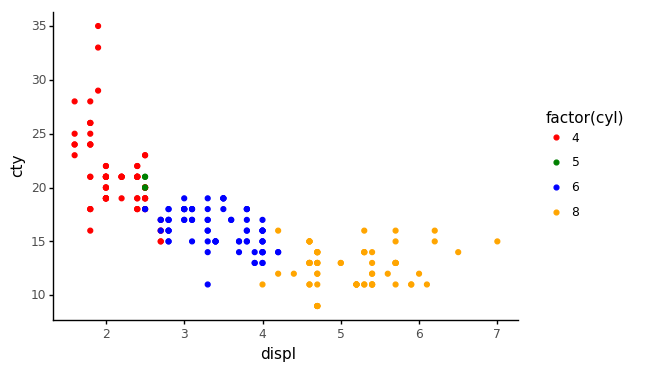

<ggplot: (291616897)>

In [11]:
# categorical - the default colors are a bit odd
a=ggplot(mpg,aes(x="displ",y="cty"))+geom_point(aes(color="factor(cyl)"))
a+scale_color_manual(values=['red','green','blue','orange'])+theme_classic()

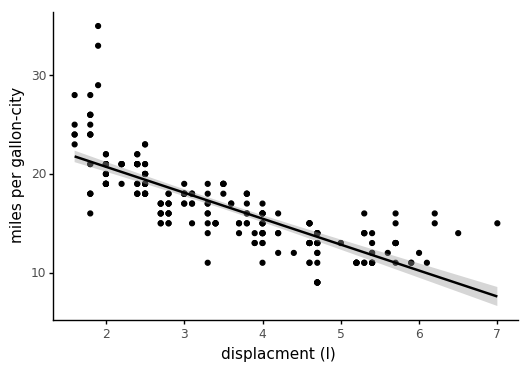

<ggplot: (292024209)>

In [12]:
# add a linear trendline with a new layer
a=ggplot(mpg,aes(x="displ",y="cty"))+theme_classic()+geom_point()
a+xlab("displacment (l)")+ylab("miles per gallon-city")+stat_smooth(method="lm")

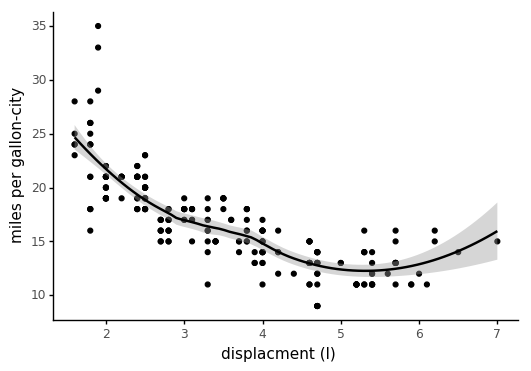

<ggplot: (291599101)>

In [13]:
# add a spline with a new layer
a+xlab("displacment (l)")+ylab("miles per gallon-city")+stat_smooth(method="loess")

/anaconda/lib/python2.7/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


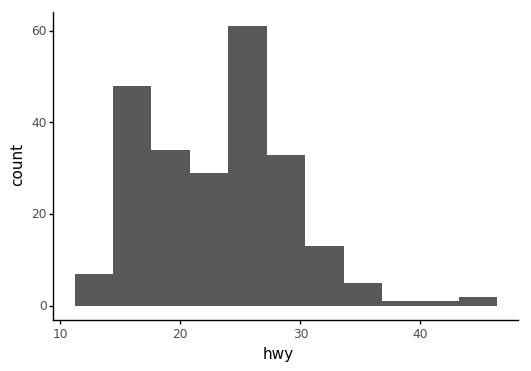

<ggplot: (292284833)>

In [14]:
# histogram of mpg hwy
b=ggplot(mpg,aes(x="hwy"))
b+geom_histogram()+theme_classic()

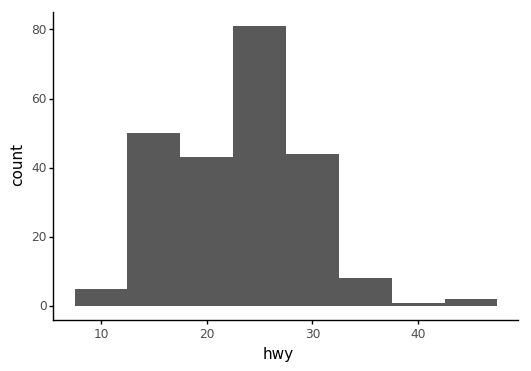

<ggplot: (291266925)>

In [15]:
# change bins
b+geom_histogram(binwidth=5)+theme_classic()

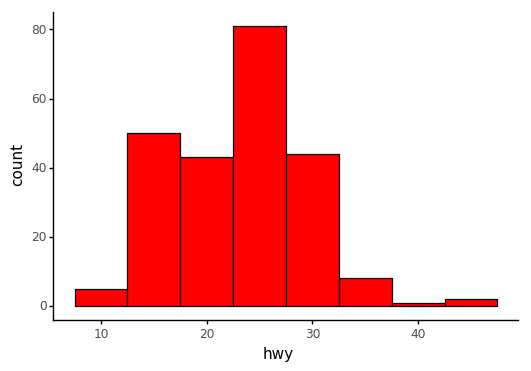

<ggplot: (291717901)>

In [16]:
# color can also be specified in the geom_histogram call
b+geom_histogram(binwidth=5,fill='red',color='black')+theme_classic()

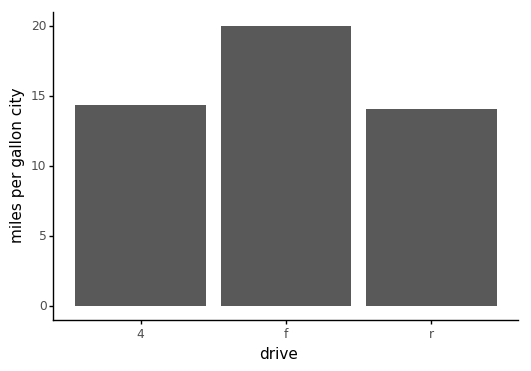

<ggplot: (291344681)>

In [17]:
# we can generate a barplot of means too
d=ggplot(mpg)+theme_classic()+xlab("drive")+ylab("miles per gallon city")
d+geom_bar(aes(x="factor(drv)",y="cty"),stat="summary",fun_y=numpy.mean)

In [18]:
# calculate means by drv to check barplot
mpg.groupby(['drv'])['cty'].mean()

drv
4    14.330097
f    19.971698
r    14.080000
Name: cty, dtype: float64

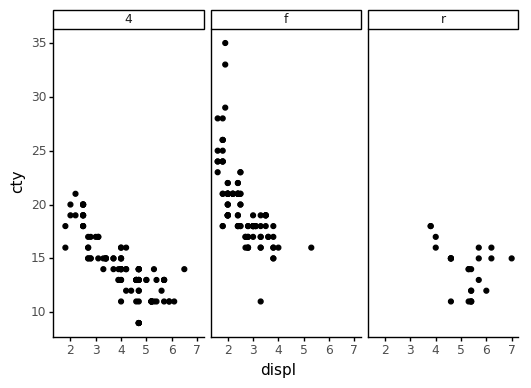

<ggplot: (291275085)>

In [19]:
# faceting allows the same plot for different classes to be generated
f=ggplot(mpg,aes(x="displ",y="cty"))+geom_point()
f+facet_wrap("~drv")+theme_classic()

## Challenge

Practice using the syntax demonstrated above by writing a script to generate the following plots using the mpg data.

1\. A scatter plot of miles per gallon city versus miles per gallon highway. Color code the points by 'drv' (four-wheel drive vs. front-wheel drive vs. rear-wheel drive). Add a linear trendline to the plot.

&nbsp;

2\. A "density plot" of engine displacement.

&nbsp;

3\. A barplot of mean displacement for different numbers of cylinders (cyl).